# Simple Neural Network in Python using TensorFlow

In [144]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

## Steps before Creating a Neural Network (Preprocess the Data)

In [145]:
# remove the warning messages to keep the output clean and to hide your personal information
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = sns.load_dataset("titanic")

In [146]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Preprocess the dataset:

In [147]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [149]:
# checking out the missing values:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [150]:
# drop rows with missing values
df.drop(columns= 'deck', axis=1, inplace=True)

# Handeling missing values of age using median:

df['age'].fillna(df['age'].median(), inplace=True)


In [151]:
# Select features and target variable
X = df.drop(['pclass', 'embarked', 'embark_town', 'alive'], axis=1)
y = df['survived']

# Convert categorical variables to numerical values by using label encoding:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in X.select_dtypes(include=['object', 'category']).columns:
    X[column] = le.fit_transform(X[column])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [152]:
# Scaling the features:

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Let's build a simple Neural Network model using Keras:

In [153]:
# Building the model

# define the layers of the model
input_layer = tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],))  # input layer
# hidden_layer = tf.keras.layers.Dense(5, activation='relu')  # hidden layer
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')  # output layer

In [154]:
# Building the model:

model = tf.keras.Sequential(
    [input_layer,
    #   hidden_layer,
        output_layer] 
    )


# compiling the model:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 
# optimizer='adam' is a common choice for optimization
# loss = 'binary_crossentropy' for binary classification
# metrics = ['accuracy'] to track the accuracy of the model

## Let's train the model:

In [155]:
%%time 
# Training the model
model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=1)


Epoch 1/20
23/23 [==============================] - 2s 4ms/step - loss: 0.8719 - accuracy: 0.5955
Epoch 2/20
23/23 [==============================] - 0s 4ms/step - loss: 0.7498 - accuracy: 0.7135
Epoch 3/20
23/23 [==============================] - 0s 4ms/step - loss: 0.6472 - accuracy: 0.7289
Epoch 4/20
23/23 [==============================] - 0s 5ms/step - loss: 0.5634 - accuracy: 0.7500
Epoch 5/20
23/23 [==============================] - 0s 7ms/step - loss: 0.4949 - accuracy: 0.7963
Epoch 6/20
23/23 [==============================] - 0s 4ms/step - loss: 0.4368 - accuracy: 0.8652
Epoch 7/20
23/23 [==============================] - 0s 4ms/step - loss: 0.3891 - accuracy: 0.8989
Epoch 8/20
23/23 [==============================] - 0s 4ms/step - loss: 0.3505 - accuracy: 0.9256
Epoch 9/20
23/23 [==============================] - 0s 4ms/step - loss: 0.3167 - accuracy: 0.9312
Epoch 10/20
23/23 [==============================] - 0s 4ms/step - loss: 0.2883 - accuracy: 0.9340
Epoch 11/20
23/23 [

In [156]:
# Evaluating the model
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=1)
print(f"Test Accuracy: {accuracy}")
print(f"Test Loss: {loss}")

6/6 [==============================] - 0s 4ms/step - loss: 0.1292 - accuracy: 0.9888
Test Accuracy: 0.9888268113136292
Test Loss: 0.1291869431734085


## Let's see all the steps in action within one snippet of code

In [157]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# remove the warning messages to keep the output clean and to hide your personal information
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = sns.load_dataset("titanic")

# drop rows with missing values
df.drop(columns= 'deck', axis=1, inplace=True)

# Handeling missing values of age using median:

df['age'].fillna(df['age'].median(), inplace=True)

# Select features and target variable
X = df.drop(['pclass', 'embarked', 'embark_town', 'alive'], axis=1)
y = df['survived']

# Convert categorical variables to numerical values by using label encoding:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in X.select_dtypes(include=['object', 'category']).columns:
    X[column] = le.fit_transform(X[column])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features:

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



# define the layers of the model
input_layer = tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],))  # input layer
# hidden_layer = tf.keras.layers.Dense(5, activation='relu')  # hidden layer
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')  # output layer


# Building the model:

model = tf.keras.Sequential(
    [input_layer,
    #   hidden_layer,
        output_layer] 
    )



# compiling the model:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 
# optimizer='adam' is a common choice for optimization
# loss = 'binary_crossentropy' for binary classification
# metrics = ['accuracy'] to track the accuracy of the model


# Training the model

model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=1)


# Evaluating the model
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=1)
print(f"Test Accuracy: {accuracy}")
print(f"Test Loss: {loss}")


Epoch 1/20
23/23 [==============================] - 2s 4ms/step - loss: 0.5965 - accuracy: 0.6742
Epoch 2/20
23/23 [==============================] - 0s 5ms/step - loss: 0.5393 - accuracy: 0.7317
Epoch 3/20
23/23 [==============================] - 0s 5ms/step - loss: 0.4936 - accuracy: 0.7697
Epoch 4/20
23/23 [==============================] - 0s 4ms/step - loss: 0.4564 - accuracy: 0.7795
Epoch 5/20
23/23 [==============================] - 0s 4ms/step - loss: 0.4251 - accuracy: 0.7935
Epoch 6/20
23/23 [==============================] - 0s 4ms/step - loss: 0.3975 - accuracy: 0.8216
Epoch 7/20
23/23 [==============================] - 0s 4ms/step - loss: 0.3730 - accuracy: 0.8329
Epoch 8/20
23/23 [==============================] - 0s 4ms/step - loss: 0.3505 - accuracy: 0.8469
Epoch 9/20
23/23 [==============================] - 0s 4ms/step - loss: 0.3286 - accuracy: 0.8525
Epoch 10/20
23/23 [==============================] - 0s 4ms/step - loss: 0.3084 - accuracy: 0.8652
Epoch 11/20
23/23 [

Let's draw a plot for checking the model performance with each epoch:

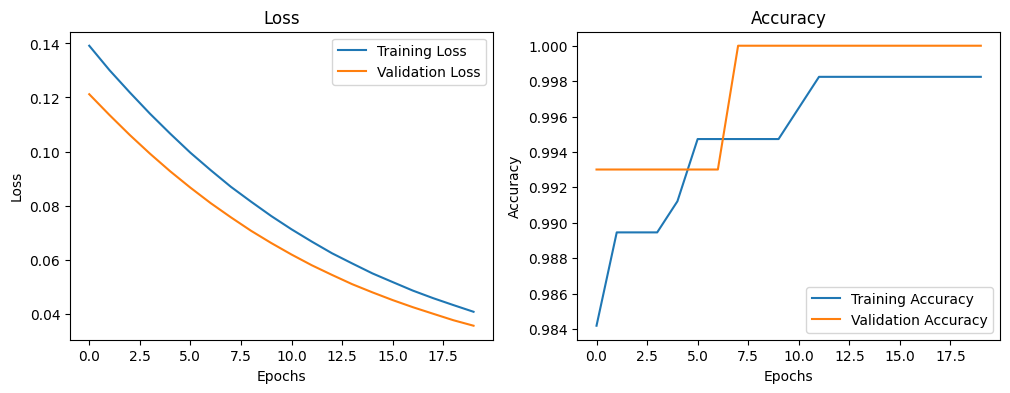

In [158]:
# plot the training and validation loss and accuracy
import matplotlib.pyplot as plt

# Re-train the model with validation_split to get validation metrics
history_obj = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=0, validation_split=0.2)

history = history_obj.history

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Check if GPU is available

In [159]:
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import scipy as sp
import tensorflow as tf
import platform

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print(f"SciPy {sp.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: Windows-10-10.0.19045-SP0
Tensor Flow Version: 2.10.0

Python 3.8.18 (default, Sep 11 2023, 13:47:48) [MSC v.1916 64 bit (AMD64)]
Pandas 2.0.3
Scikit-Learn 1.3.2
SciPy 1.10.1
GPU is NOT AVAILABLE


---